In [103]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

<function matplotlib.pyplot.show(close=None, block=None)>

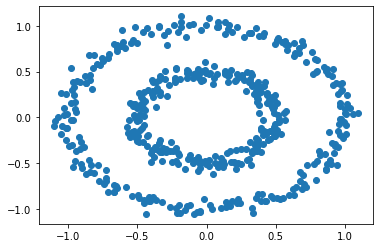

In [104]:
n=500
p=2
X,Y = make_circles(n_samples=n, factor=0.5, noise=0.05)
plt.scatter(X[:,0], X[:,1])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

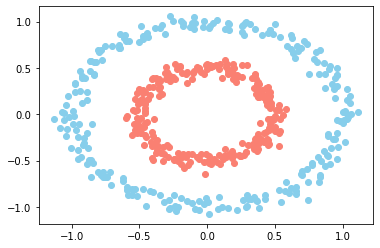

In [105]:
n=500
p=2
X,Y = make_circles(n_samples=n, factor=0.5, noise=0.05)
Y=Y[:,np.newaxis]
#representamos cada conjunto con colores distintos
plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1],c="skyblue")
plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1],c="salmon")

plt.show

In [106]:
class capa_neuronas():
    
    def __init__(self, n_con,n_neur,act_f):
        self.act_f = act_f
        #self.b = np.random.rand(1,n_neur)*2 -1 #en [-1,1]
        self.b = np.random.normal(-1,1,size=(1,n_neur))        
        self.W = np.random.normal(-1,1,size=(n_con,n_neur))
        #self.W = np.random.rand(n_con,n_neur)*2 -1#en [-1,1]

In [107]:
#FUNCIONES DE ACTIVACIÓN
sigm = (lambda x: 1/(1+np.e**(-x)),
        lambda x: x*(1-x))#sigmoide y derivada
relu = lambda x: np.maximum(0,x)


In [108]:
def crear_red(topologia, act_f):
    red=[]
    for l, capa in enumerate(topologia[:-1]):
        red.append(capa_neuronas(topologia[l], topologia[l+1], act_f))
    return red

In [109]:
topologia=[p,4,8,4,1]
red=crear_red(topologia,sigm)
print(red)

[<__main__.capa_neuronas object at 0x7f2bafa7c6a0>, <__main__.capa_neuronas object at 0x7f2bafa7c5e0>, <__main__.capa_neuronas object at 0x7f2bafa7cac0>, <__main__.capa_neuronas object at 0x7f2bafa7cf70>]


In [110]:
l2_cost= (lambda Yp, Yr: np.mean((Yp-Yr)**2),
          lambda Yp,Yr: (Yp-Yr)
          )


In [111]:
def train(red_neuronal, X,Y, l2_cost, lr=0.1,train=True):
    
    out = [(None,X)]
    #paso hacia adelante
    for l,layer in enumerate(red_neuronal):
        z=out[-1][1] @ red_neuronal[l].W + red_neuronal[l].b
        a = red_neuronal[l].act_f[0](z)
        out.append((z,a))
    if train:
        #paso hacia atrás
        deltas=[]
        for l in reversed(range(0,len(red_neuronal))):
            z=out[l+1][0]
            a=out[l+1][1]
            if l==len(red_neuronal)-1:
                deltas.insert(0, l2_cost[1](a,Y)*red_neuronal[l].act_f[1](a))
            else:
                deltas.insert(0,deltas[0] @ _W.T *red_neuronal[l].act_f[1](a))
            _W = red_neuronal[l].W
            
            
#DESCENSO DEL GRADIENTE
            red_neuronal[l].b = red_neuronal[l].b - np.mean(deltas[0],axis=0,keepdims=True)*lr
            red_neuronal[l].W = red_neuronal[l].W - out[l][1].T @ deltas[0] *lr
       
    return out[-1][1]

train(red,X,Y,l2_cost,0.5)

array([[0.13611113],
       [0.16963487],
       [0.16769486],
       [0.16731039],
       [0.14336542],
       [0.14582584],
       [0.14163192],
       [0.15275677],
       [0.14500617],
       [0.14650005],
       [0.17159508],
       [0.14228655],
       [0.17496729],
       [0.13923327],
       [0.16352305],
       [0.1515311 ],
       [0.17321812],
       [0.17104286],
       [0.14500765],
       [0.13891164],
       [0.16235817],
       [0.14850751],
       [0.15774421],
       [0.15362087],
       [0.17120588],
       [0.17670586],
       [0.1651424 ],
       [0.14415279],
       [0.17490461],
       [0.17576907],
       [0.14513838],
       [0.137391  ],
       [0.17605625],
       [0.15411134],
       [0.17462308],
       [0.17446874],
       [0.14364438],
       [0.17571459],
       [0.15037117],
       [0.18211403],
       [0.18176385],
       [0.18194336],
       [0.16315488],
       [0.1463284 ],
       [0.14495122],
       [0.16576509],
       [0.16457775],
       [0.144

In [112]:
import time 
from IPython.display import clear_output
red_neuronal = crear_red(topologia, sigm)
loss=[]
for i in range(2000):
    
    #entrenamos la red
    pY= train(red_neuronal,X,Y,l2_cost,0.1)
    
    if i%25==0:
        
        #print(pY)
        
        loss.append(l2_cost[0](pY,Y))
        
        res = 50
        
        _x0 = np.linspace(-1.5,1.5, res)
        _x1 = np.linspace(-1.5,1.5, res)
        
        _Y = np.zeros((res,res))
        
        for i0,x0 in enumerate(_x0):
            for i1,x1 in enumerate(_x1):
                _Y[i0,i1]= train(red_neuronal,np.array([[x0,x1]]),Y,l2_cost,0.2,train=False)[0][0]
                
        plt.pcolormesh(_x0,_x1,_Y, cmap="coolwarm")
        plt.axis("equal")
        
        plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1],c="skyblue")
        plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c="salmon")
        
        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)),loss)
            plt.show()
            time.sleep(0.5)
        

KeyboardInterrupt: 